acceleration

$$
F_α = {mα \over 2}
$$

Angular acceleration

$$
F_{Δω} = {IΔω \over 2T}
$$

Centrifugal force

$$
F_ω = {mvω \over 2}
$$

However, T is the absolute value of the force applied to the left and right tires of the tread width is

$$
F_R = \sqrt{(F_α + F_{Δω})^2 + F_ω^2} \\
F_L = \sqrt{(F_α - F_{Δω})^2 + F_ω^2}
$$

$$
F = \sqrt{\left({I\dot{\omega} \over 2T}\right)^2 + \left({mv\omega \over 2}\right)^2}
$$

Peter:

```
angularVelocity = ( (long) turnAngularVelocity * sintable[512 * fwdCurrPos / lambda]) / 65536;
```

In [1]:
%matplotlib inline

In [3]:
import sympy
from sympy import Eq
from sympy import solve
from sympy import symbols
from sympy.plotting import plot



sympy.init_printing()

In [4]:
mass, inertia, T, linear_velocity, parameter = symbols('m I T v lambda', positive=True)

$$
F = \sqrt{\left({I\dot{\omega} \over 2T}\right)^2 + \left({mv\omega \over 2}\right)^2}
$$

In [5]:
from sympy import Function, Symbol, sin, sqrt

x, max_angular_velocity = symbols('x omega_max', positive=True)
#angular_velocity = Function('omega', real=True)(x)
angular_velocity = max_angular_velocity * sin(x / parameter)
angular_velocity

In [6]:
angular_acceleration = angular_velocity.diff(x)
angular_acceleration

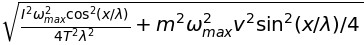

In [7]:
eq = sqrt(((inertia * angular_acceleration) / (2 * T)) ** 2 + (mass * linear_velocity * angular_velocity / 2) ** 2)
eq

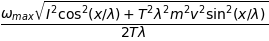

In [8]:
eq = sympy.simplify(eq)
eq

In [9]:
param_value = 0.02
substitutions = {
    max_angular_velocity: 10,
    inertia: (0.1 * 0.05 ** 2) / 2,
    T: 0.04,
    linear_velocity: 1,
    parameter: param_value,
    mass: 0.1,
}
fx = eq.subs(substitutions)
fx

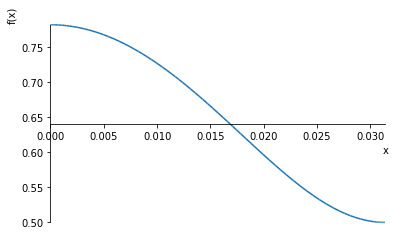

In [10]:
plot(fx, (x, 0, param_value * 3.14 / 2))

In [11]:
angular_velocity

In [12]:
from sympy import sin, cos, integrate


v_x = linear_velocity * cos(integrate(angular_velocity, x))
v_y = linear_velocity * sin(integrate(angular_velocity, x))

v_x, v_y

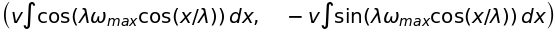

In [13]:
p_x = integrate(v_x, x)
p_y = integrate(v_y, x)

p_x, p_y

ValueError: Invalid limits given: (0j,)

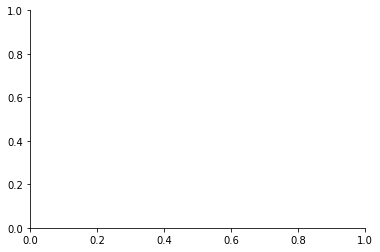

In [14]:
from sympy.plotting import plot_parametric


plot_parametric(p_x.subs(substitutions), p_y.subs(substitutions), (x, 0, param_value * 3.14 / 2),
                xlim=(0.9, 1), ylim=(-0.2, 0))